<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_2_ML_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

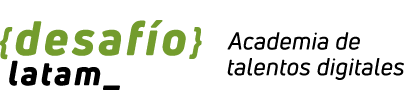

<center><h1> <font color='green'>Clustering con KMeans</font></h1></center>


## Importación de bibliotecas y lectura de datos

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

wine = load_wine()
data = pd.DataFrame(wine.data)
X = data.iloc[:, 0:3]

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X.head()

,0,1,2
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


In [4]:
len(X)

178

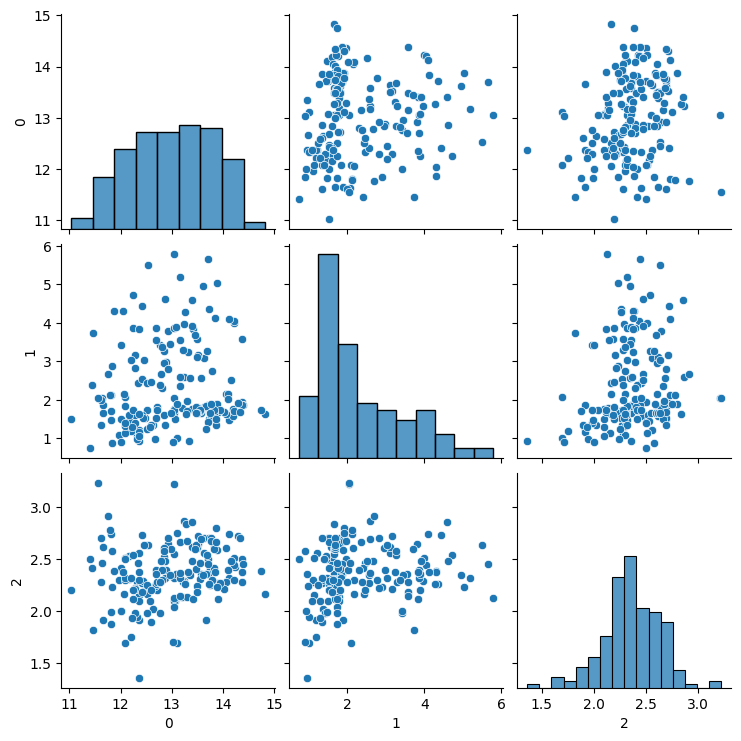

In [5]:
#Veremos la relación entre las variables
sns.pairplot(X)

Text(0.5, 1.0, 'Correlación')

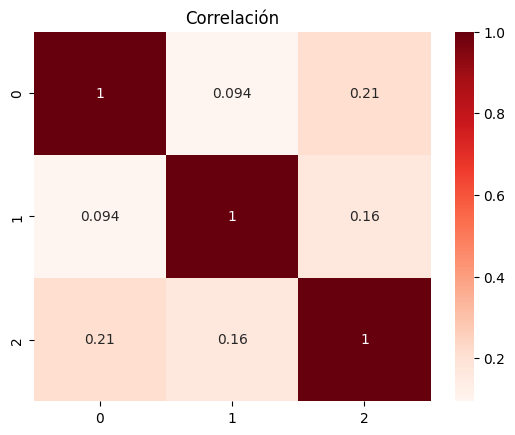

In [7]:
sns.heatmap(X.corr() , cmap='Reds', annot=True)
plt.title('Correlación')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

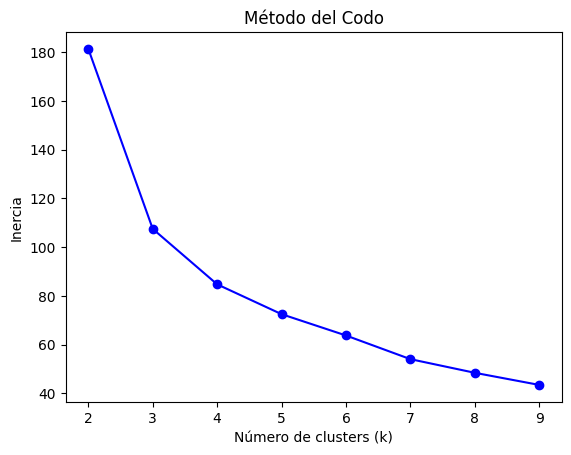

In [8]:
# Definir una lista de posibles valores de k para el método del codo
k_values = range(2, 10)

# Inicializar listas para almacenar las métricas
inertia_values = []
# Realizar clustering con diferentes valores de k y calcular las métricas
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    #labels = kmeans.labels_
    # Calcular la inercia
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo utilizando la inercia
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [9]:
# Realizar clustering con el valor óptimo de k (elegido por el método del codo)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels

X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-9-3b7c00c00df1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = labels


,0,1,2,clusters
0,14.23,1.71,2.43,2
1,13.20,1.78,2.14,2
2,13.16,2.36,2.67,2
3,14.37,1.95,2.50,2
4,13.24,2.59,2.87,2


In [10]:
X['clusters'].value_counts()

,count
clusters,
2,64
0,64
1,50


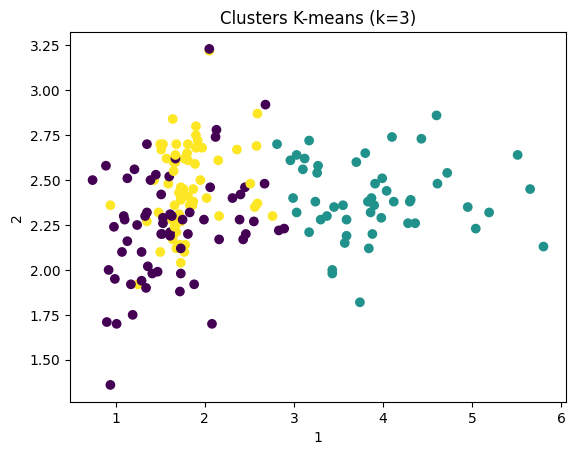

In [9]:

# Graficar los clusters en el espacio reducido por PCA
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels)
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Clusters K-means (k=3)')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

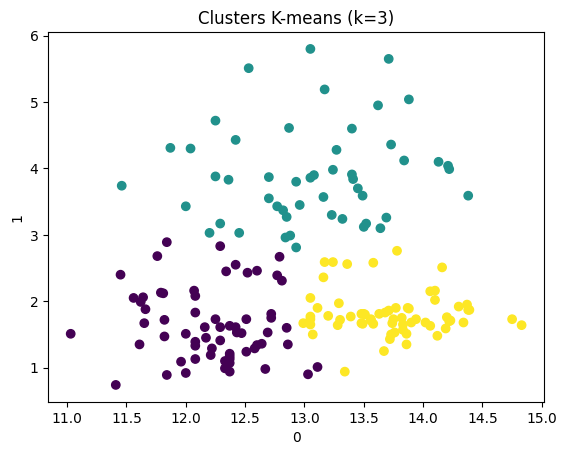

In [11]:
# Graficar los clusters en el espacio reducido por PCA
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Clusters K-means (k=3)')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

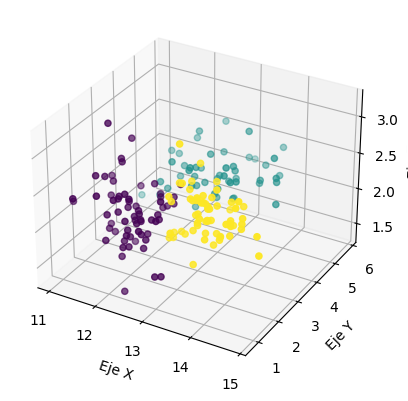

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura
fig = plt.figure()

# Crear los ejes 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=X['clusters'], marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Mostrar la gráfica
plt.show()

In [14]:
wine = load_wine()
data = pd.DataFrame(wine.data)
X = data.iloc[:, 0:3]
X2 = X
optimal_k = 3
kmeans2 = KMeans(n_clusters=optimal_k, random_state=1)
kmeans2.fit(X2)
labels = kmeans2.labels_
X2['clusters'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-14-332a98c1944c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['clusters'] = labels


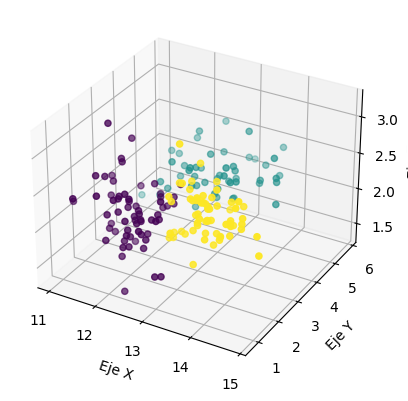

In [15]:
# Crear la figura
fig = plt.figure()

# Crear los ejes 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(X2.iloc[:, 0], X2.iloc[:, 1], X2.iloc[:, 2], c=X2['clusters'], marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Mostrar la gráfica
plt.show()

In [16]:
# Calcular la puntuación de silueta
silhouette_scores = silhouette_score(X, labels)
# Calcular el índice de Dunn
dunn_index = davies_bouldin_score(X, labels)
print(f'Silhoutte Score : {silhouette_scores}')
print(f'Davies Bouldin Score : {dunn_index}')

Silhoutte Score : 0.5993732031648719
Davies Bouldin Score : 0.5986373181851599


In [17]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 4.5 MB/s eta 0:00:00


In [18]:
#fuzzy
#!pip install scikit-fuzzy #podría ser necesario
import skfuzzy as fuzz

In [21]:
# Definir una lista de posibles valores de m
m_values = np.arange(0.5, 4, 0.1)

# Inicializar listas para almacenar las métricas
silhouette_scores_fuzzy = []
davies_bouldin_scores_fuzzy = []

# Realizar clustering fuzzy con diferentes valores de m y calcular las métricas

for m in m_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, m, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)

    # Calcular la puntuación de silueta
    silhouette_scores_fuzzy.append(silhouette_score(X, labels))

    # Calcular el índice de Dunn
    dunn_index = davies_bouldin_score(X, labels)
    davies_bouldin_scores_fuzzy.append(dunn_index)

# Encontrar el valor óptimo de m basado en la puntuación de silueta
optimal_index = np.argmax(silhouette_scores_fuzzy)
optimal_m = m_values[optimal_index]

print(silhouette_scores_fuzzy)
print(davies_bouldin_scores_fuzzy)

print(optimal_index)
print(optimal_m)

[0.4123573845878193, 0.34211600814379334, 0.32425051056270804, 0.24844214821498786, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719, 0.5993732031648719]
[1.096547386787425, 1.095525403718173, 1.0969868140169952, 1.1220690022235515, 0.5986373181851599, 0.59863731818516, 0.59863731818516, 0.59863731818516, 0.59863731818516, 0.59863731818516, 0.5986373181851599, 0.5986373181851599, 0.59863731818516, 0.59863731818516, 0.5986373181851599, 0.598637318

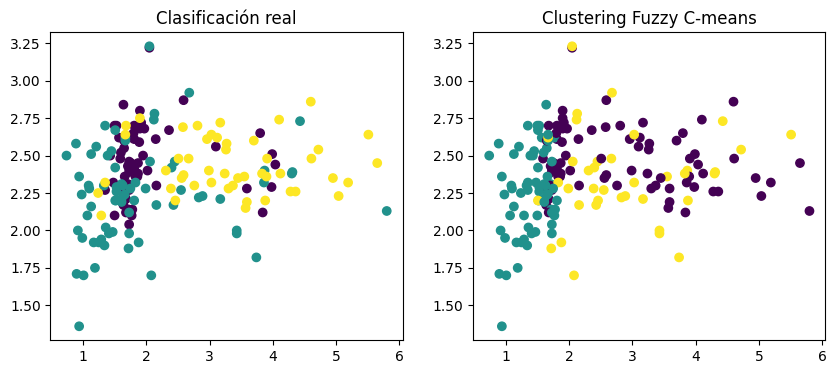

Valor óptimo de m: 0.8999999999999999


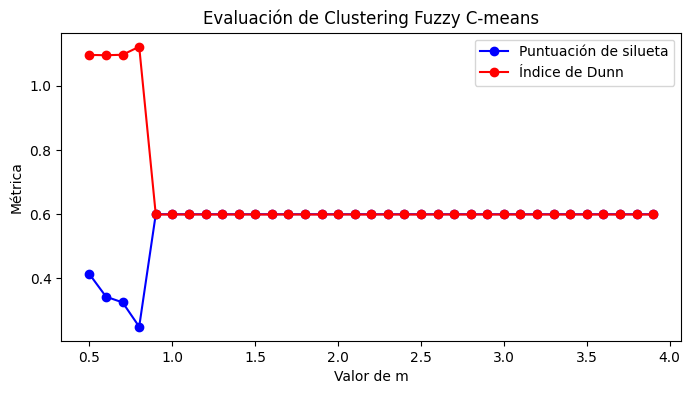

In [22]:
# Realizar clustering con el valor óptimo de m
optimal_cntr, optimal_u, optimal_u0, optimal_d, optimal_jm, optimal_p, optimal_fpc = \
fuzz.cluster.cmeans(X.T, 3, optimal_m, error=0.005, maxiter=1000)
optimal_labels = np.argmax(optimal_u, axis=0)

# Graficar los resultados en 2D
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=wine.target, cmap='viridis')
plt.title('Clasificación real')
plt.subplot(122)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=optimal_labels, cmap='viridis')
plt.title('Clustering Fuzzy C-means')
plt.show()

# Imprimir el valor óptimo de m
print(f"Valor óptimo de m: {optimal_m}")

#Graficar la puntuación de silueta y el índice de Dunn
plt.figure(figsize=(8, 4))
plt.plot(m_values, silhouette_scores_fuzzy, 'bo-', label='Puntuación de silueta')
plt.plot(m_values, davies_bouldin_scores_fuzzy, 'ro-', label='Índice de Dunn')
plt.xlabel('Valor de m')
plt.ylabel('Métrica')
plt.title('Evaluación de Clustering Fuzzy C-means')
plt.legend()
plt.show()

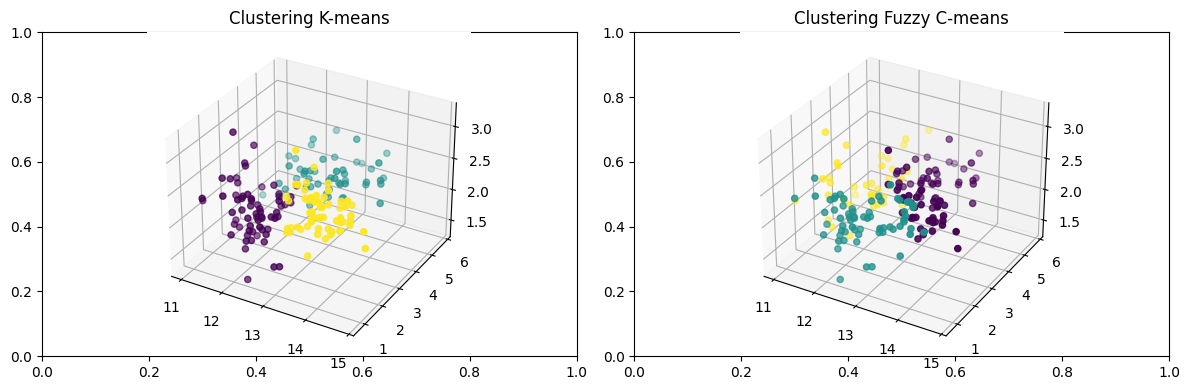

In [23]:


# Crear la figura y los ejes para dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Crear los ejes 3D
ax1 = fig.add_subplot(121, projection='3d')
# Primer gráfico
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=X['clusters'], marker='o')
ax1.set_title('Clustering K-means')

# Segundo gráfico
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=optimal_labels, marker='o')
ax2.set_title('Clustering Fuzzy C-means')


# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()



In [25]:
#jerarquicos

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram



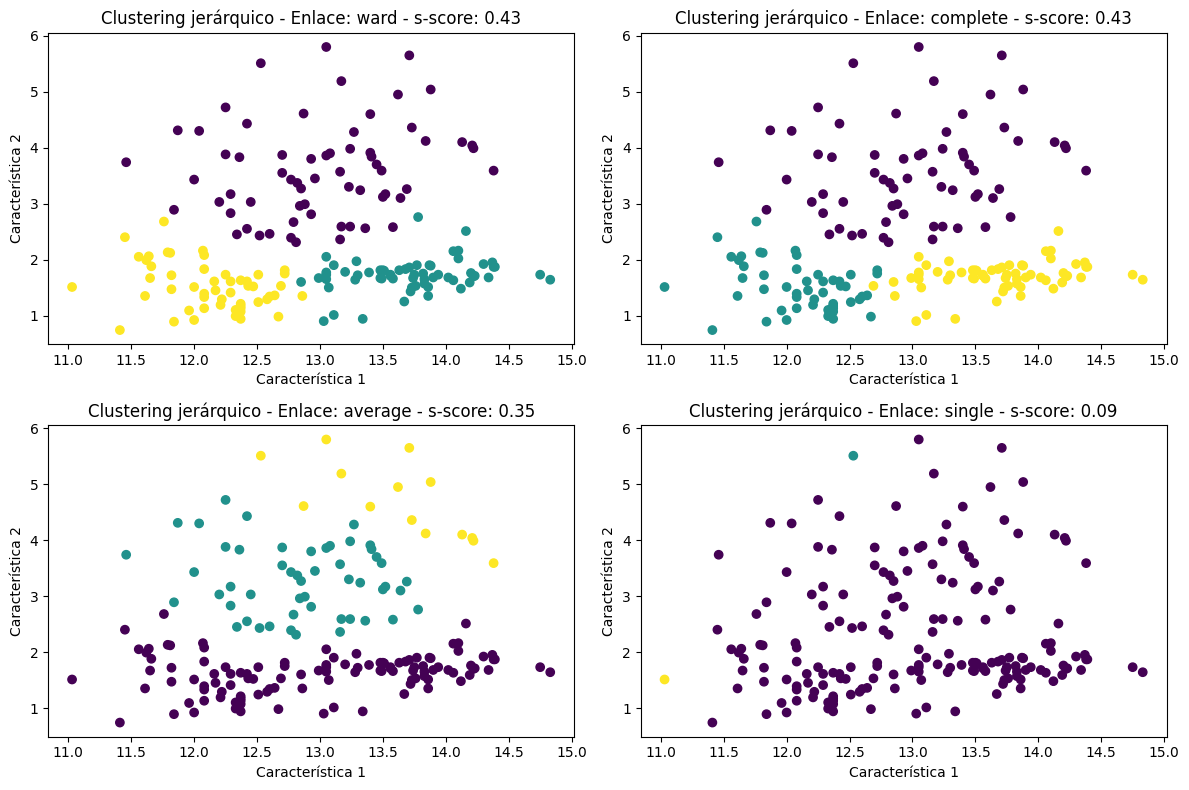

In [26]:
# Realizar clustering jerárquico con diferentes métodos de enlace. Para ello creamos la lista
linkage_methods = ['ward', 'complete', 'average', 'single']

wine = load_wine()
data = pd.DataFrame(wine.data)
X = data.iloc[:, 0:3]

plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X)
    sc = silhouette_score(X, labels)

    # Graficar los puntos en un diagrama de dispersión para las dos primeras columnas
    plt.subplot(2, 2, i+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title(f'Clustering jerárquico - Enlace: {method} - s-score: {sc:.2f}')

plt.tight_layout()
plt.show()

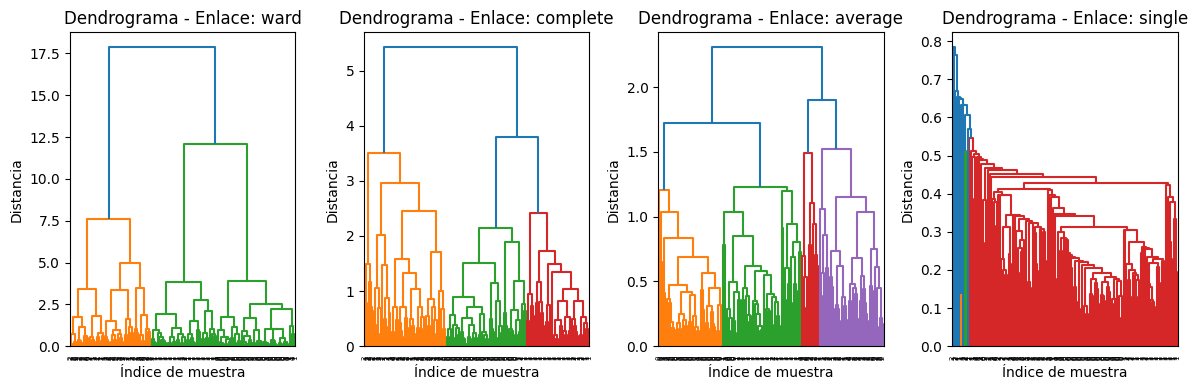

In [27]:
#dendogramas

# Graficar los dendrogramas
plt.figure(figsize=(12, 4))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    Z = linkage(X, method)

    # Convertir la matriz de enlace a tipo float
    Z = Z.astype(float)

    # Graficar el dendrograma
    plt.subplot(1, 4, i+1)
    dendrogram(Z, labels=wine.target)
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia')
    plt.title(f'Dendrograma - Enlace: {method}')

plt.tight_layout()
plt.show()

In [28]:
#cluster con mejor método
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X)

# Analizar los clusters obtenidos
for cluster in range(3):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_samples = wine.data[cluster_indices]
    cluster_target = wine.target[cluster_indices]
    cluster_name = wine.target_names[cluster]
    print(f'Cluster {cluster}: {cluster_name}')
    print(f'Número de muestras: {len(cluster_samples)}')
    print(f'Características más representativas: {np.mean(cluster_samples, axis=0)}')
    print(f'Etiquetas reales en el cluster: {np.unique(cluster_target)}')
    print('---')

Cluster 0: class_0
Número de muestras: 64
Características más representativas: [1.30007813e+01 3.60000000e+00 2.39906250e+00 2.06921875e+01
 9.87187500e+01 1.94906250e+00 1.36750000e+00 4.10625000e-01
 1.36593750e+00 5.77890623e+00 7.79531250e-01 2.20218750e+00
 6.24140625e+02]
Etiquetas reales en el cluster: [0 1 2]
---
Cluster 1: class_1
Número de muestras: 62
Características más representativas: [1.37237097e+01 1.72258065e+00 2.42838710e+00 1.78612903e+01
 1.04306452e+02 2.75790323e+00 2.76419355e+00 3.04193548e-01
 1.83387097e+00 5.82516129e+00 1.05403226e+00 2.98354839e+00
 1.04504839e+03]
Etiquetas reales en el cluster: [0 1 2]
---
Cluster 2: class_2
Número de muestras: 52
Características más representativas: [1.21382692e+01 1.51288462e+00 2.25269231e+00 1.99692308e+01
 9.55576923e+01 2.16923077e+00 1.96750000e+00 3.70576923e-01
 1.57807692e+00 3.25634615e+00 1.06126923e+00 2.67230769e+00
 5.42480769e+02]
Etiquetas reales en el cluster: [1 2]
---


In [ ]:
## tips para el desafio

#1)

df.info()
df.describe()

#eliminar nulos y faltantes
# ver valores unicos
# ver valores negativos


In [29]:
df = pd.read_excel('Retail_Invoices.xlsx')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [31]:
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


In [ ]:
columnas=df.dtypes

In [ ]:
## ayuda para el desafio

## 1) carga la data

#df.info()
#df.describe()

## 2)Limpiar la data
# Eliminar registro negativos
# eliminar datos atipicos, data < quantile([0.95]
# graficar pairplot() heatmap()
# revisar fechas
# hacer group by por CustomerID y agregar campos numericos relevantes (sum, count, promedio, max_fecha)
# graficar pairplot() heatmap()

## 3)Procesar la data
# seleccionar variables relevantes, con base a indicadores estadisticos
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# validar X

## 4)Ejecutar modelo
# metodo del codo
# Elegir K optimo (4)
# aplicar Kmeans
# graficar resultados 2D o 3D
# Aplicar cluster aglomerativo
# graficar resultados 2D o 3D
# Generar dendrogrma

## 5) Evaluar modelo
# calcular silhouette score
# calcular davies bouldin score
# Comparar
# Caracterizar los cluster

sns.heatmap()

sns.pairplot()


obtener las 3 columnas mas representativas

In [33]:
df['CustomerID'].value_counts()

,count
CustomerID,
14911,248
12748,224
17841,169
14606,128
13089,118
...,...
16178,1
12864,1
16305,1


In [ ]:
df.groupby('Custumer').agg()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)